In [1]:
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [1]:
from model import MNISTModel

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [3]:
train_data=datasets.MNIST(root="data", train=True,transform=ToTensor(),download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.6MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 657kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 5.70MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.53MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
test_data=datasets.MNIST(root="data", train=False, transform=ToTensor(),download=True)

In [5]:
len(test_data)

10000

In [6]:
len(train_data)

60000

In [ ]:
type(train_data[0])

tuple

In [7]:
class_names=train_data.classes

In [8]:
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

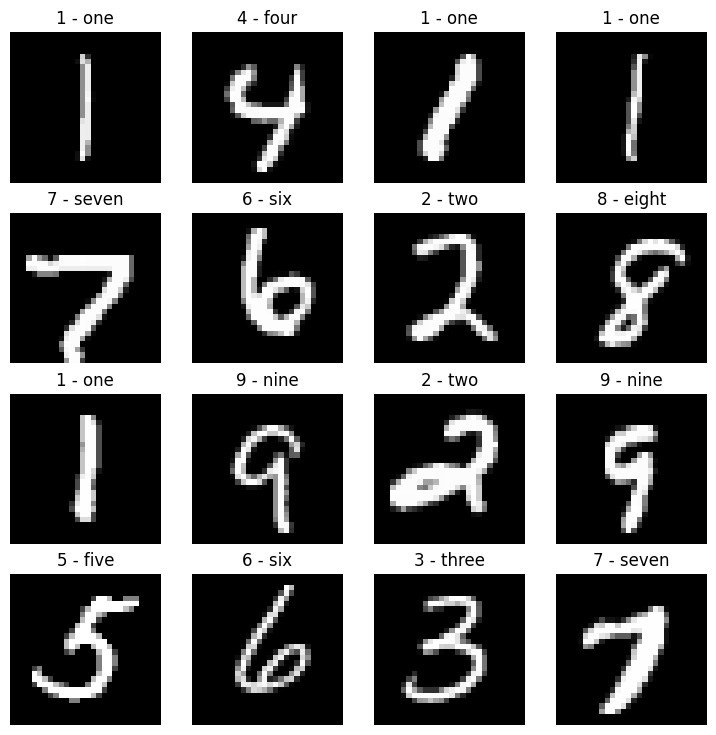

In [9]:
# Plot more images
torch.manual_seed(123)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item() #convert tensor scalar to python scalar
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [10]:
BATCH_SIZE=32
train_data_loader=DataLoader(train_data, batch_size=BATCH_SIZE,shuffle=True)
test_data_loader=DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [13]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [14]:
from torchmetrics import Accuracy, F1Score, ConfusionMatrix

In [15]:
accuracy_fn=Accuracy(task="multiclass", num_classes=10)

In [16]:
confmat=ConfusionMatrix(task='multiclass', num_classes=10)

In [20]:
f1=F1Score(task="multiclass", num_classes=10)

In [11]:
len(test_data_loader)

313

In [27]:
if torch.cuda.is_available():
  device="cuda"
else:
  device="cpu"

In [18]:
from torch import nn

In [41]:
torch.manual_seed(42)
model_2=MNISTModel(1 ,10, 10).to(device)

In [42]:
optimiser=torch.optim.SGD(params=model_2.parameters(), lr=0.1)
loss_fn=nn.CrossEntropyLoss()

In [43]:
import torch
from torch import nn

In [45]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device =None):
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU (if available)
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_pred.argmax(dim=1),y) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


In [48]:
from sklearn.metrics import f1_score

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()  # Put model in eval mode

    y_true = []
    y_pred = []

    with torch.inference_mode():  # Inference context manager
        for X, y in data_loader:
            # Send data to device (GPU/CPU)
            X, y = X.to(device), y.to(device)

            # Forward pass
            test_pred = model(X)
            pred_labels = test_pred.argmax(dim=1)  # Convert logits to predicted labels

            y_true.extend(y.cpu().numpy())  # Store true labels
            y_pred.extend(pred_labels.cpu().numpy())  # Store predicted labels

            # Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y).item()
            test_acc += accuracy_fn(pred_labels, y)

        # Compute final metrics
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        f1 = f1_score(y_true, y_pred, average="weighted")  # Weighted F1-score

        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}% | F1-score: {f1:.4f}\n")



### Training our Model

In [47]:
torch.manual_seed(123)

from tqdm.auto import tqdm
y_pred=[]
# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
 train_step(model_2, train_data_loader, loss_fn, optimiser, accuracy_fn, device)
 test_step(test_data_loader,model_2,loss_fn, accuracy_fn, device,y_pred)


  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.25788 | Train accuracy: 0.91%
Test loss: 0.06049 | Test accuracy: 0.98%

Train loss: 0.06756 | Train accuracy: 0.98%
Test loss: 0.05155 | Test accuracy: 0.98%

Train loss: 0.05262 | Train accuracy: 0.98%
Test loss: 0.04683 | Test accuracy: 0.98%

